In [3]:
import os
import sys

sys.path.append("/home/yammo/C:/Users/gianm/Development/multi-view-classification/src")

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from src.data_generator import MultiViewDataGenerator
from src.model_evaluation import evaluate_model, visualize_wrong_predictions

In [4]:
# Set data parameters and paths
data_dir = r"/home/yammo/C:/Users/gianm/Development/multi-view-classification/dataset"
input_shape = (224, 224, 3)
batch_size = 8

In [5]:
# Initialize data generator (this will also create train/test splits)
data_gen = MultiViewDataGenerator(
    data_dir=data_dir,
    input_shape=input_shape,
    batch_size=batch_size
)

I0000 00:00:1741249398.662502   18261 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6096 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5


Found 6 categories
Found 388 complete objects with all 5 views
Filtered out 0 objects with missing views
Training set: 310 objects
Testing set: 78 objects


In [6]:
# Get test dataset and class names
test_ds = data_gen.get_test_dataset()
class_names = data_gen.get_class_names()

In [7]:
# Compute validation steps:
validation_steps = len(data_gen.test_samples) // batch_size
if len(data_gen.test_samples) % batch_size != 0:
    validation_steps += 1

In [8]:
# Load the saved model (change the path if needed)
model_path = r"/home/yammo/C:/Users/gianm/Development/multi-view-classification/results/run_20250306-084246/model_best.keras"
model = load_model(model_path)

I0000 00:00:1741249427.140620   18642 service.cc:148] XLA service 0x7f5488002b70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741249427.140690   18642 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 2070, Compute Capability 7.5
2025-03-06 09:23:47.510858: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741249429.418363   18642 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-06 09:23:50.409687: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[8,64,56,56]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,64,56,56]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_confi

Classification Report:
              precision    recall  f1-score   support

       chair       0.96      0.93      0.95       166
        cone       0.93      0.94      0.94       124
    fireplug       0.98      0.78      0.87       140
        ring       1.00      0.97      0.99       102
    seashell       0.78      0.85      0.81       119
      shield       0.75      0.91      0.82       107

    accuracy                           0.89       758
   macro avg       0.90      0.90      0.89       758
weighted avg       0.90      0.89      0.90       758



TypeError: Image data of dtype object cannot be converted to float

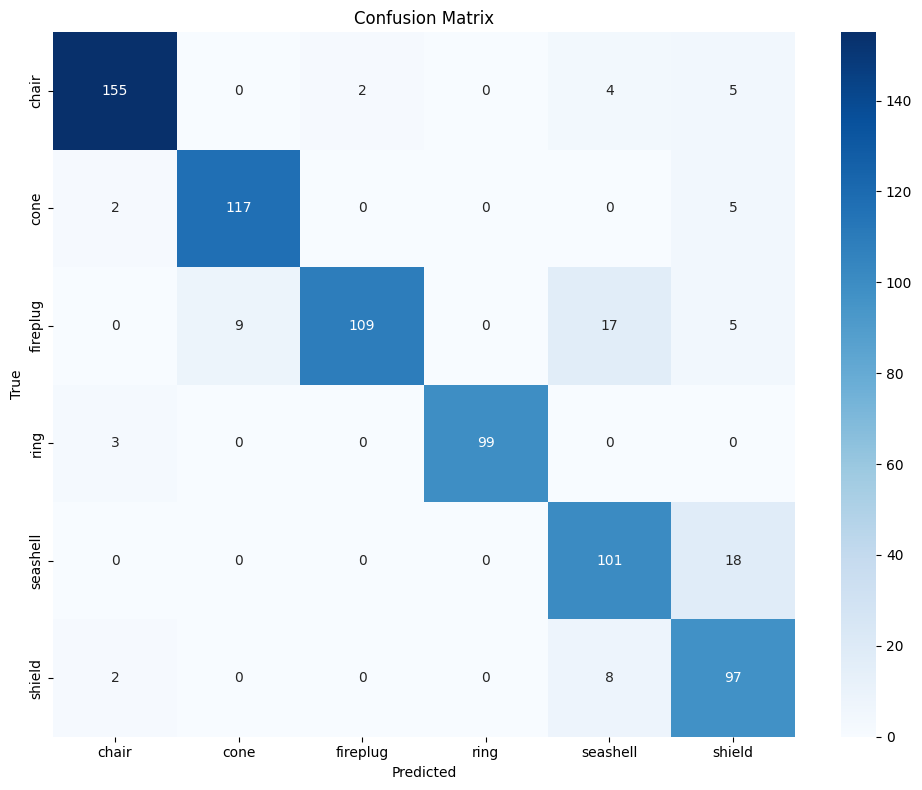

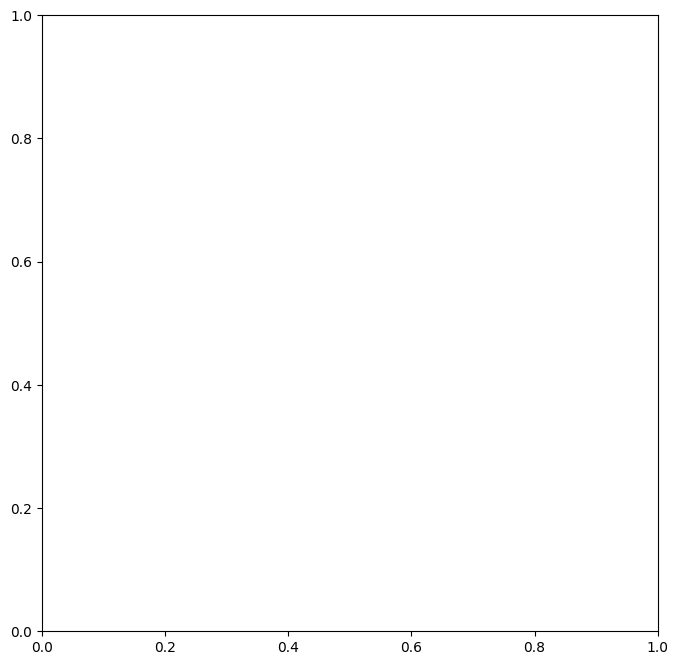

In [9]:
# Evaluate the model using the helper function
report, cm_fig, y_true, y_pred = evaluate_model(model, test_ds, class_names, validation_steps)

# Show/plot the confusion matrix figure
plt.figure(figsize=(10, 8))
plt.imshow(cm_fig)
plt.axis('off')
plt.show()

# Optionally, display wrong predictions:
wrong_fig = visualize_wrong_predictions(model, test_ds, class_names, num_samples=5)
if wrong_fig:
    plt.show(wrong_fig)